## Sea Level Predictor

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import linregress

## The idea of this project is to analyze the global average sea level since 1880, and predict the sea level growth at 2050. The behaviour of the sea level has been approximately linear between 1880 and 2013, for this reason we consider a linear least-squares regression. In order to analize future sea level values we made an adjustment in the last decade due to an explosive growth in this period.

In [37]:
# Read data from file
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


## The data source is provided by the US Environmental Protection Agency: Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.&nbsp;https://datahub.io/core/sea-level-rise

In [38]:
# Create scatter plot
#Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level 
#column as the y-axix.

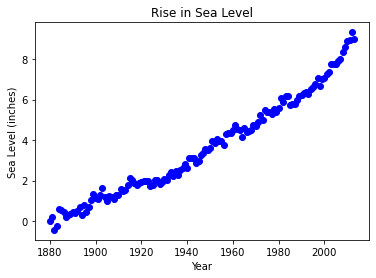

In [39]:
x =df['Year']
   
y =df['CSIRO Adjusted Sea Level']
plt.scatter(x, y, c ="blue")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title('Rise in Sea Level')

# To show the plot
plt.show()

In [40]:
#positive relationship, we see the rise of sea levels over the years

In [41]:
# Create first line of best fit (2 different ways done)

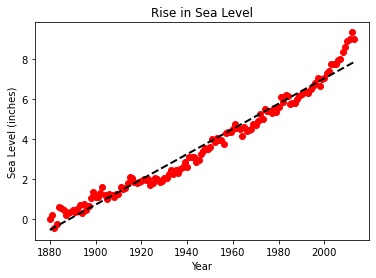

In [42]:
a, b = np.polyfit(x, y, 1) #numpy. polyfit will only return an equation that goes through all the points (say you have N) if the degree of the polynomial is at least N-1. Otherwise, it will return a best fit that minimises the squared error
plt.scatter(x, y,color='red')
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title('Rise in Sea Level')
plt.plot(x, a*x+b, color='black', linestyle='--', linewidth=2) 

In [43]:
#Scipy linregress returns tuple when passed Pandas data
#Linear regression uses the relationship between the data-points to draw a straight line through all them. This line can be used to predict future values.

In [44]:
res = linregress(x,y) #With this linear function, we are able to predict the sea level behaviour. To see if it is correct we can check the fit in to the data plotting the data and the linear regression. We use the statistical data visualization package Seaborn.
print(res)


LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)


Text(0.5, 1.0, 'Rise in Sea Level')

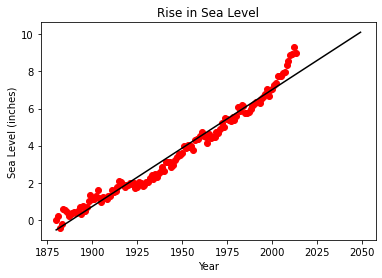

In [46]:
x_pred = pd.Series([i for i in range(1880,2050)])
y_pred = res.slope * x_pred + res.intercept
plt.scatter(x, y,color='red')
plt.plot(x_pred,y_pred,'black')
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title('Rise in Sea Level')

In [47]:
# Analysis: We see that the fit of the linear function is correct, but the data suffer an important growth in the last decade. For this reason we consider values above the year 2000 and we compute
#again the linear regression for this data. We suspect in 2050, that the sea level will be about 10 inches.

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)


Text(0.5, 1.0, 'Rise in Sea Level')

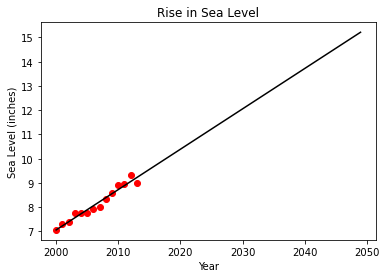

In [48]:
# Create second line of best fit
df2 = df.loc[df['Year'] >= 2000]
x2 = df2['Year']
y2= df2['CSIRO Adjusted Sea Level']
res2 = linregress(x2,y2)
print(res2)
x2_pred = pd.Series([i for i in range(2000,2050)])
y2_pred = res2.slope * x2_pred + res2.intercept
plt.scatter(x2, y2,color='red')
plt.plot(x2_pred,y2_pred,'black')
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title('Rise in Sea Level')

In [49]:
#Analysis: We suspect in 2050, that the sea level will be slightly above 15inches above the normalized value (Year = 1880) from the first best fit.